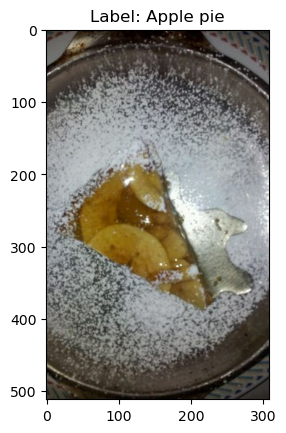

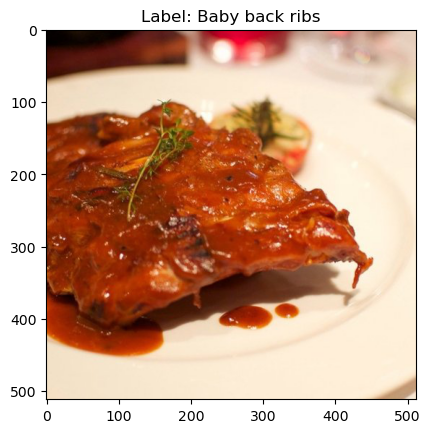

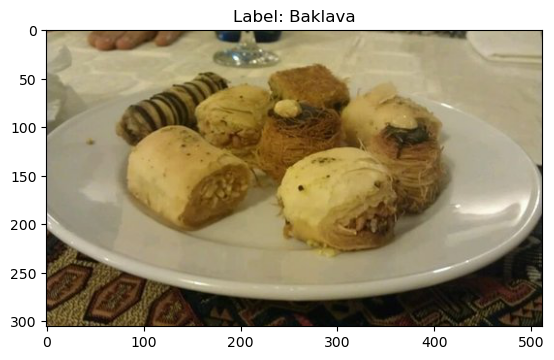

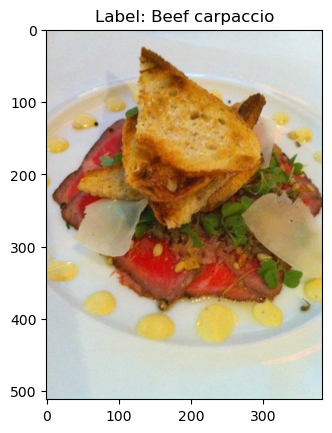

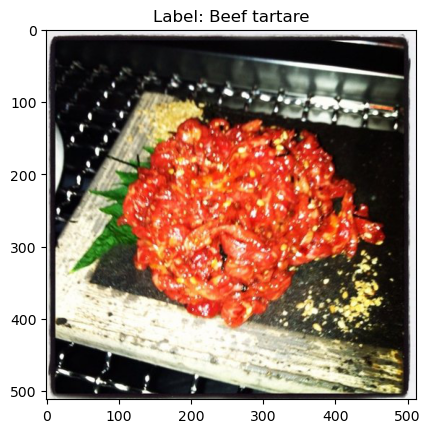

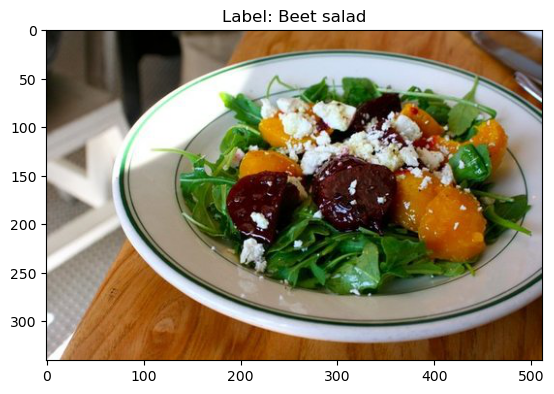

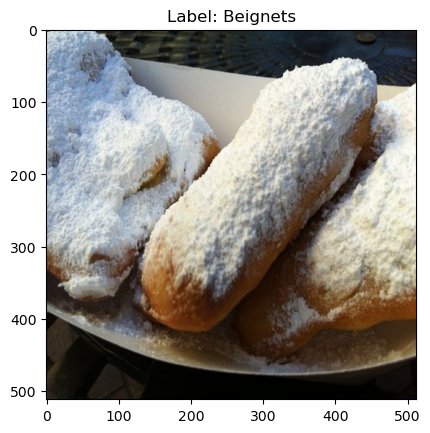

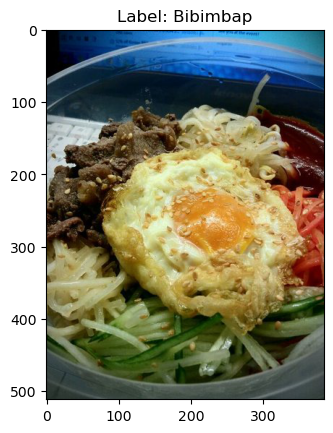

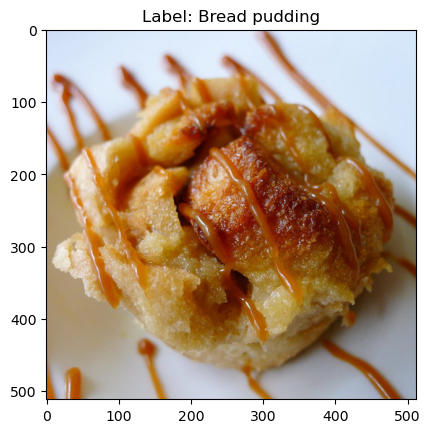

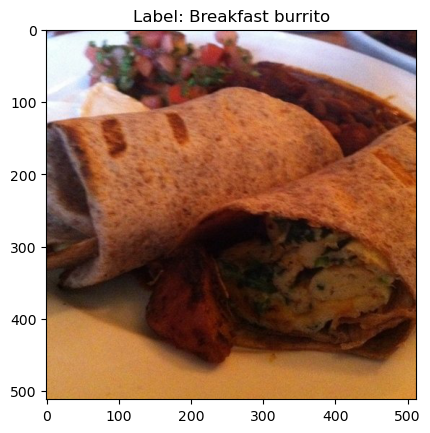

In [ ]:
from food_dataset import FoodDataset
import constants
from matplotlib import pyplot as plt

dataset = FoodDataset(constants.dataset_root, 
                      constants.class_names[:10], 
                      constants.class_labels[:10],
                      constants.transforms)

for i in range(10):
    image, cls = dataset[i*1000+1]
    plt.figure()
    plt.imshow(image)
    plt.title(f"Label: {dataset.get_class_label(cls)}")
